# ==== INTERACTIVE CLUSTERING : EFFICIENCE STUDY ====
> ### DRAFTS : Plot some figures on computation time evolution

-----

## READ-ME BEFORE RUNNING

### Quick Description

TODO

### Description each steps

TODO

-----

## 2. Plots somes graphs and statistics

***WARNING***: _Start by launching the experiment runs, evaluations and synthesis, and launching main effects analysis before this section !_

### 2.1. Load Python dependencies and Experiements data

Import Python dependencies.

In [1]:
from typing import Any, Dict, List, Optional, Tuple, Union
import listing_envs
import json
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
from scipy import stats as scipystats

Find all experiment environments.

In [2]:
# Get list of experiment environments.
LIST_OF_EXPERIMENT_ENVIRONMENTS: List[
    str
] = listing_envs.get_list_of_experiment_env_paths()
print(
    "There are",
    "`" + str(len(LIST_OF_EXPERIMENT_ENVIRONMENTS)) + "`",
    "experiment environments in `../experiments`",
)

There are `960` experiment environments in `../experiments`


### 2.2. Display iteration needed to annotated the groundtruth (_efficiency_)

Define the list of iteration to analyze.

In [7]:
# Prepare histograms.
list_of_090vmeasure_iterations = []
list_of_100vmeasure_iterations = []
list_of_convergence_iterations = []

# For each environment...
for env_1 in LIST_OF_EXPERIMENT_ENVIRONMENTS:

    # Load annotations for the current experiment.
    with open(
        env_1 + "dict_of_constraints_annotations.json", "r"
    ) as annotation_file:
        dict_of_constraints_annotations: Dict[
            str, List[Tuple[str, str, Optional[str]]]
        ] = json.load(annotation_file)
            
    # Load clustering performance for the current experiment.
    with open(
        env_1 + "dict_of_clustering_performances.json", "r"
    ) as evaluations_file:
        dict_of_clustering_evaluations: Dict[
            str, Dict[str, float]
        ] = json.load(evaluations_file)

    # Update histogram for convergence.
    current_max_iteration: str = max(dict_of_constraints_annotations.keys())
    list_of_convergence_iterations.append(int(current_max_iteration))
    
    # Update histogram for vmeasure=100.
    if dict_of_clustering_evaluations[current_max_iteration]["v_measure"] < 1.00:
        list_of_100vmeasure_iterations.append(-1)
    else:
        for iteration in sorted(dict_of_clustering_evaluations.keys(), reverse=True):
            if dict_of_clustering_evaluations[iteration]["v_measure"] < 1.00:
                break
            continue
        list_of_100vmeasure_iterations.append(int(iteration))

    # Update histogram for vmeasure=090.
    if dict_of_clustering_evaluations[current_max_iteration]["v_measure"] < 0.90:
        list_of_090vmeasure_iterations.append(-1)
    else:
        for iteration in sorted(dict_of_clustering_evaluations.keys(), reverse=True):
            if dict_of_clustering_evaluations[iteration]["v_measure"] < 0.90:
                break
            continue
        list_of_090vmeasure_iterations.append(int(iteration))
            
# Get maximum iteration.
MAX_ITER: str = str(max(list_of_convergence_iterations)).zfill(4)
# If set, force maximum iteration.
####if forced_max_iter is not None:
####    MAX_ITER = min(MAX_ITER, forced_max_iter)
print("MAX_ITER:", MAX_ITER)

# Set list of iterations to analyze.
LIST_OF_ITERATIONS: List[str] = [str(i).zfill(4) for i in range(int(MAX_ITER))]

MAX_ITER: 0394


### 2.3. Display mean of computation time per iterations (_efficiency_)

Define main functions.

In [8]:
def get_MEAN_STDEV_SEM_of_computation_time_evolution_per_iteration(
    local_LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS,
) -> Tuple[Dict[str, float], Dict[str, float], Dict[str, float]]:
    """
    Compute evolution of computation time accross iterations.
    Return Mean, Standard deviation and Standard error of the mean evolutions
    
    Args:
        - local_LIST_OF_ITERATIONS (List[str]): The list of iterations to consider.
        - local_LIST_OF_EXPERIMENT_ENVIRONMENTS (List[str]): The list of experiments to consider.
    Returns:
        Tuple[Dict[str, float], Dict[str, float], Dict[str, float]]: Evolutions of Mean, Standard deviation and Standard error of the mean accross iterations.
    """

    # Initialize storage of experiment computation time for all iterations.
    dict_of_global_computation_time_evolution_per_iteration: Dict[str, List[float]] = {
        iter_perf: [] for iter_perf in local_LIST_OF_ITERATIONS
    }
    # Initialize storage of computation time mean for all iterations.
    dict_of_global_computation_time_evolution_per_iteration_MEAN: Dict[str, float] = {
        iter_mean: 0 for iter_mean in local_LIST_OF_ITERATIONS
    }
    # Initialize storage of computation time standard deviation for all iterations.
    dict_of_global_computation_time_evolution_per_iteration_STDEV: Dict[str, float] = {
        iter_stdev: 0 for iter_stdev in local_LIST_OF_ITERATIONS
    }
    # Initialize storage of computation time standard error of the mean for all iterations.
    dict_of_global_computation_time_evolution_per_iteration_SEM: Dict[str, float] = {
        iter_sem: 0 for iter_sem in local_LIST_OF_ITERATIONS
    }

    # For each experiment...
    for env_a in local_LIST_OF_EXPERIMENT_ENVIRONMENTS:

        # Load computation time evaluations.
        with open(env_a + "dict_of_computation_times.json", "r") as time_file:
            dict_of_computation_times: Dict[str, Dict[str, float]] = json.load(
                time_file
            )

        # For each requested iteration...
        last_iter: str = "0000"
        for iter_a in local_LIST_OF_ITERATIONS:

            # Append the clustering computation time for the current experiment and for this iteration.
            if iter_a in dict_of_computation_times.keys():
                last_iter = iter_a
                dict_of_global_computation_time_evolution_per_iteration[iter_a].append(
                    dict_of_computation_times[iter_a]["sampling_TOTAL_RUN"] + dict_of_computation_times[iter_a]["clustering_TOTAL_RUN"]
                )
            # If iteration isn't reached by this experiment, duplicate the last known results.
            else:
                dict_of_global_computation_time_evolution_per_iteration[iter_a].append(
                    0.0 + dict_of_computation_times[last_iter]["clustering_TOTAL_RUN"]
                )

    # Compute mean and sem of computation time for each iteration.
    for iter_b in local_LIST_OF_ITERATIONS:

        # Compute mean of computation time for this iteration.
        dict_of_global_computation_time_evolution_per_iteration_MEAN[iter_b] = np.mean(dict_of_global_computation_time_evolution_per_iteration[iter_b])
        
        # Compute stdev of computation time for this iteration.
        dict_of_global_computation_time_evolution_per_iteration_STDEV[iter_b] = np.std(dict_of_global_computation_time_evolution_per_iteration[iter_b])

        # Compute sem of computation time for this iteration.
        dict_of_global_computation_time_evolution_per_iteration_SEM[iter_b] = scipystats.sem(dict_of_global_computation_time_evolution_per_iteration[iter_b])
        
    # Return
    return (
        dict_of_global_computation_time_evolution_per_iteration_MEAN,
        dict_of_global_computation_time_evolution_per_iteration_STDEV,
        dict_of_global_computation_time_evolution_per_iteration_SEM
    )

In [9]:
def add_plot_of_computation_time_evolution_per_iteration_to_graph(
    axis,
    list_of_x: List[str],
    dict_of_y: Dict[str, float],
    dict_of_y_err: Optional[Dict[str, float]] = None,
    label: str = "",
    marker: str = "",
    markersize: int = 5,
    color: str = "black",
    linewidth: int = 2,
    linestyle: str = "-",
    alpha: float = 0.2,
):
    """
    Add a plot to an axis of a graph.
    
    Args:
        - axis (): TODO.
        - list_of_x (List[str]): TODO.
        - dict_of_y (Dict[str, float]): TODO.
        - dict_of_y_err (Optional[Dict[str, float]]): TODO. Defaults to `None`.
        - label (str): TODO. Defaults to `""`.
        - marker (str): TODO. Defaults to `""`.
        - markersize (int): TODO. Defaults to `5`.
        - color (str): TODO. Defaults to `"black"`.
        - linewidth (int): TODO. Defaults to `2`.
        - linestyle (str): TODO. Defaults to `"-"`.
        - alpha (float): TODO. Defaults to `0.2`.
    """
    # Add curve.
    axis.plot(
        [float(x) for x in list_of_x],  # x
        [dict_of_y[x] for x in list_of_x],  # y
        label=label,
        marker=marker,
        markerfacecolor=color,
        markersize=markersize,
        color=color,
        linewidth=linewidth,
        linestyle=linestyle,
    )
    # Add curve error bars.
    if dict_of_y_err is not None:
        axis.fill_between(
            [float(x) for x in list_of_x],  # x
            y1=[(dict_of_y[x] - dict_of_y_err[x]) for x in list_of_x],  # y1
            y2=[(dict_of_y[x] + dict_of_y_err[x]) for x in list_of_x],  # y2
            color=color,
            alpha=alpha,
        )

Evolution of computation time per iteration of MEAN + BEST SETTINGS.

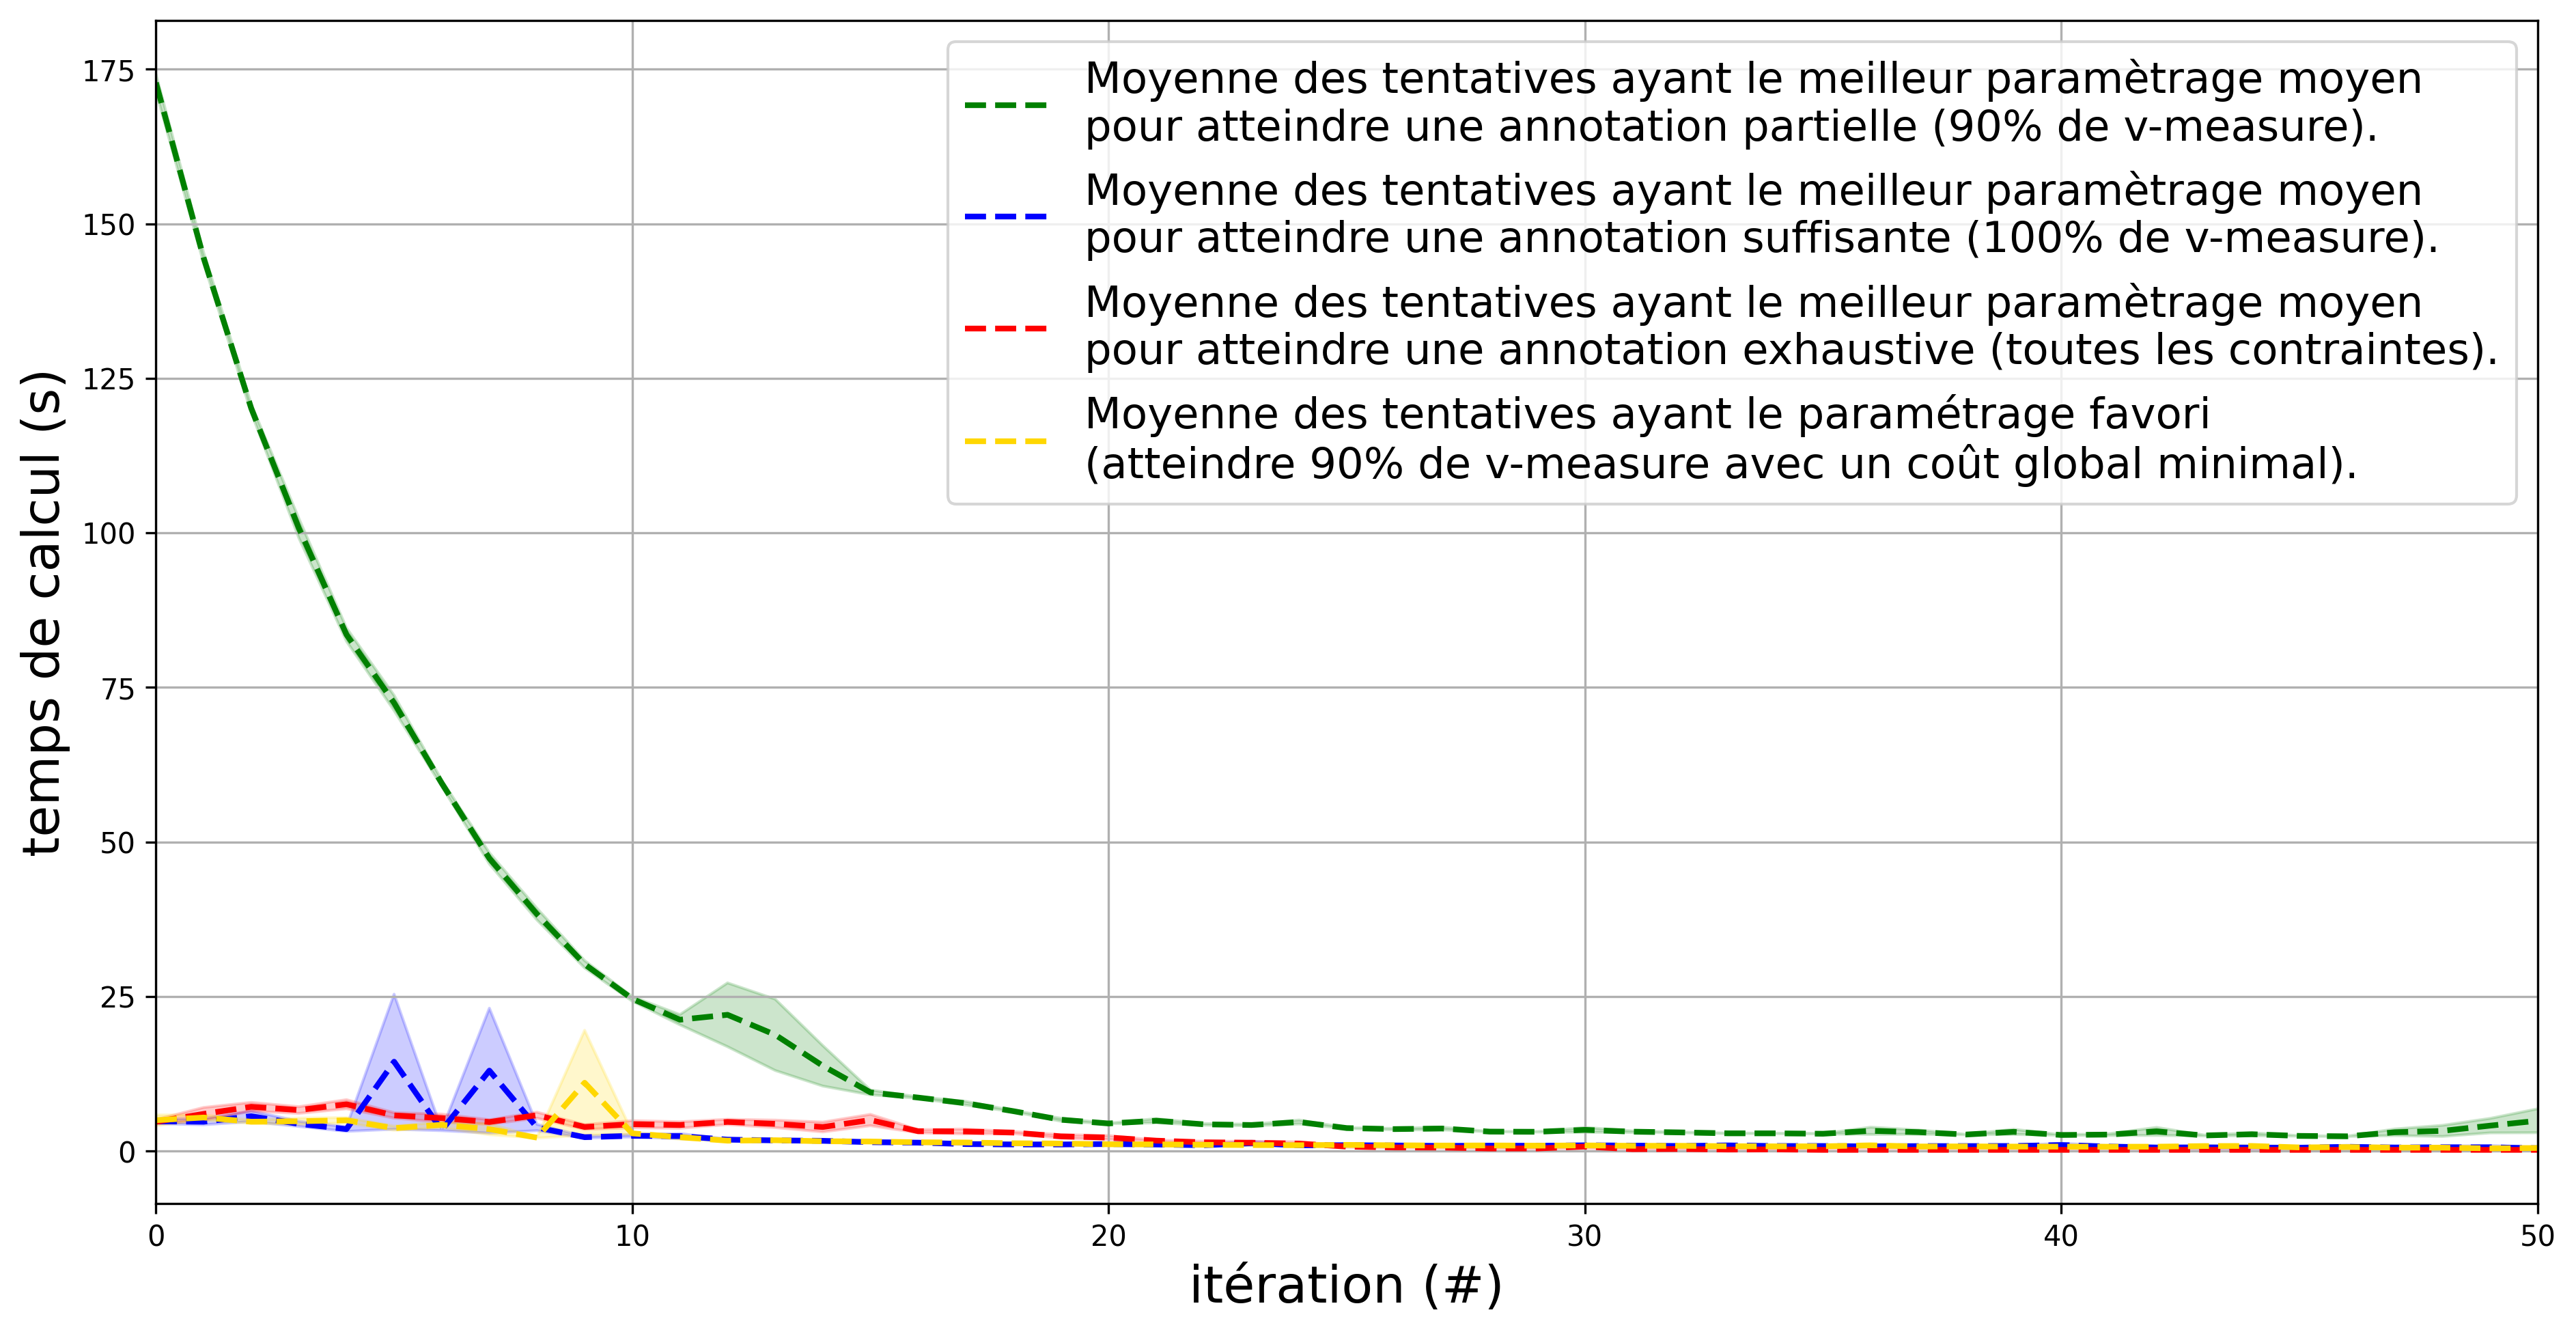

In [17]:
# Create a new figure.
fig_plot_best_anova1: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_best_anova1 = fig_plot_best_anova1.gca()

# Set range of axis.
axis_plot_best_anova1.set_xlim(xmin=0, xmax=50)
#axis_plot_best_anova1.set_ylim(ymin=0, ymax=25)

# Plot average clustering computation time evolution to reach 90% of vmeasure.
MEAN_convergence_BEST_ANOVA_90, STDEV_convergence_BEST_ANOVA_90, SEM_convergence_BEST_ANOVA_90 = get_MEAN_STDEV_SEM_of_computation_time_evolution_per_iteration(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if ("simple_prep" in env)
        and ("tfidf" in env)
        and ("hier_avg" in env)
        and ("closest" in env)
    ],
)
add_plot_of_computation_time_evolution_per_iteration_to_graph(
    axis=axis_plot_best_anova1,
    list_of_x=LIST_OF_ITERATIONS,
    dict_of_y=MEAN_convergence_BEST_ANOVA_90,
    dict_of_y_err=SEM_convergence_BEST_ANOVA_90,
    label="Moyenne des tentatives ayant le meilleur paramètrage moyen\npour atteindre une annotation partielle (90% de v-measure).",
    marker="",
    markersize=3,
    color="green",
    linewidth=2,
    linestyle="--",
    alpha=0.2,
)
    
# Plot average clustering computation time evolution to reach 100% of vmeasure.
MEAN_convergence_BEST_ANOVA_100, STDEV_convergence_BEST_ANOVA_100, SEM_convergence_BEST_ANOVA_100 = get_MEAN_STDEV_SEM_of_computation_time_evolution_per_iteration(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if ("lemma_prep" in env)
        and ("tfidf" in env)
        and ("kmeans_COP" in env)
        and ("closest" in env)
    ],
)
add_plot_of_computation_time_evolution_per_iteration_to_graph(
    axis=axis_plot_best_anova1,
    list_of_x=LIST_OF_ITERATIONS,
    dict_of_y=MEAN_convergence_BEST_ANOVA_100,
    dict_of_y_err=SEM_convergence_BEST_ANOVA_100,
    label="Moyenne des tentatives ayant le meilleur paramètrage moyen\npour atteindre une annotation suffisante (100% de v-measure).",
    marker="",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
    alpha=0.2,
)

# Plot average clustering computation time evolution to reach constraints completude.
MEAN_convergence_BEST_ANOVA_MAX, STDEV_convergence_BEST_ANOVA_MAX, SEM_convergence_BEST_ANOVA_MAX = get_MEAN_STDEV_SEM_of_computation_time_evolution_per_iteration(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if ("lemma_prep" in env)
        and ("tfidf" in env)
        and ("kmeans_COP" in env)
        and ("in_same" in env)
    ],
)
add_plot_of_computation_time_evolution_per_iteration_to_graph(
    axis=axis_plot_best_anova1,
    list_of_x=LIST_OF_ITERATIONS,
    dict_of_y=MEAN_convergence_BEST_ANOVA_MAX,
    dict_of_y_err=SEM_convergence_BEST_ANOVA_MAX,
    label="Moyenne des tentatives ayant le meilleur paramètrage moyen\npour atteindre une annotation exhaustive (toutes les contraintes).",
    marker="",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
    alpha=0.2,
)

# Plot average clustering computation time evolution that have been choosen.
MEAN_convergence_BEST_CHOOSEN, STDEV_convergence_BEST_CHOOSEN, SEM_convergence_BEST_CHOOSEN = get_MEAN_STDEV_SEM_of_computation_time_evolution_per_iteration(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if ("simple_prep" in env)
        and ("tfidf" in env)
        and ("kmeans_COP" in env)
        and ("closest" in env)
    ],
)
add_plot_of_computation_time_evolution_per_iteration_to_graph(
    axis=axis_plot_best_anova1,
    list_of_x=LIST_OF_ITERATIONS,
    dict_of_y=MEAN_convergence_BEST_CHOOSEN,
    dict_of_y_err=SEM_convergence_BEST_CHOOSEN,
    label="Moyenne des tentatives ayant le paramétrage favori\n(atteindre 90% de v-measure avec un coût global minimal).",
    marker="",
    markersize=3,
    color="gold",
    linewidth=2,
    linestyle="--",
    alpha=0.2,
)

# Set axis name.
axis_plot_best_anova1.set_xlabel("itération (#)", fontsize=18,)
axis_plot_best_anova1.set_ylabel("temps de calcul (s)", fontsize=18,)

# Plot the legend.
axis_plot_best_anova1.legend(fontsize=15,)

# Plot the grid.
axis_plot_best_anova1.grid(True)

# Store the graph.
fig_plot_best_anova1.savefig(
    "../results/etude-temps-calcul-evolution-moyenne-5best-par-iteration.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)